In [81]:
#packages
library(caret)
install.packages("ellipse")
library(ellipse)
install.packages("kernlab")
library(kernlab)
urlPackage <- "https://cran.r-project.org/src/contrib/Archive/randomForest/randomForest_4.6-12.tar.gz"
install.packages(urlPackage, repos=NULL, type="source")
library(randomForest)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

randomForest 4.6-12

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




In [ ]:
#dataset
# attach the iris dataset to the environment
data(iris)
# rename the dataset
dataset <- iris


In [58]:
#validation dataset
# create a list of 80% of the rows in the original dataset we can use for training
validation_index <- createDataPartition(dataset$Species, p=0.80, list=FALSE)
# select 20% of the data for validation
validation <- dataset[-validation_index,]
# use the remaining 80% of data to training and testing the models
dataset <- dataset[validation_index,]

In [73]:
#learning about the dataset
dim(dataset)
sapply(dataset, class)
levels(dataset$Species)
percentage <- prop.table(table(dataset$Species)) * 100
cbind(freq=table(dataset$Species), percentage=percentage)
summary(dataset)

[1] 120   5

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"     "factor"

[1] "setosa"     "versicolor" "virginica"

,freq,percentage
setosa,40,33.33333
versicolor,40,33.33333
virginica,40,33.33333


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.812   Mean   :3.036   Mean   :3.744   Mean   :1.196  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.700   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :40  
 versicolor:40  
 virginica :40  
                
                
                

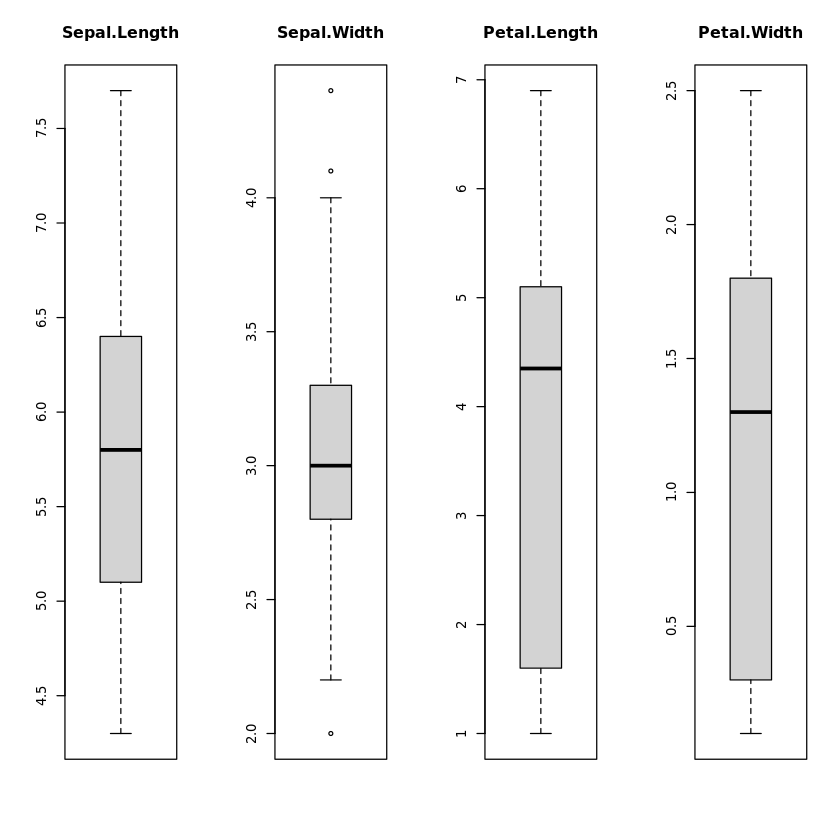

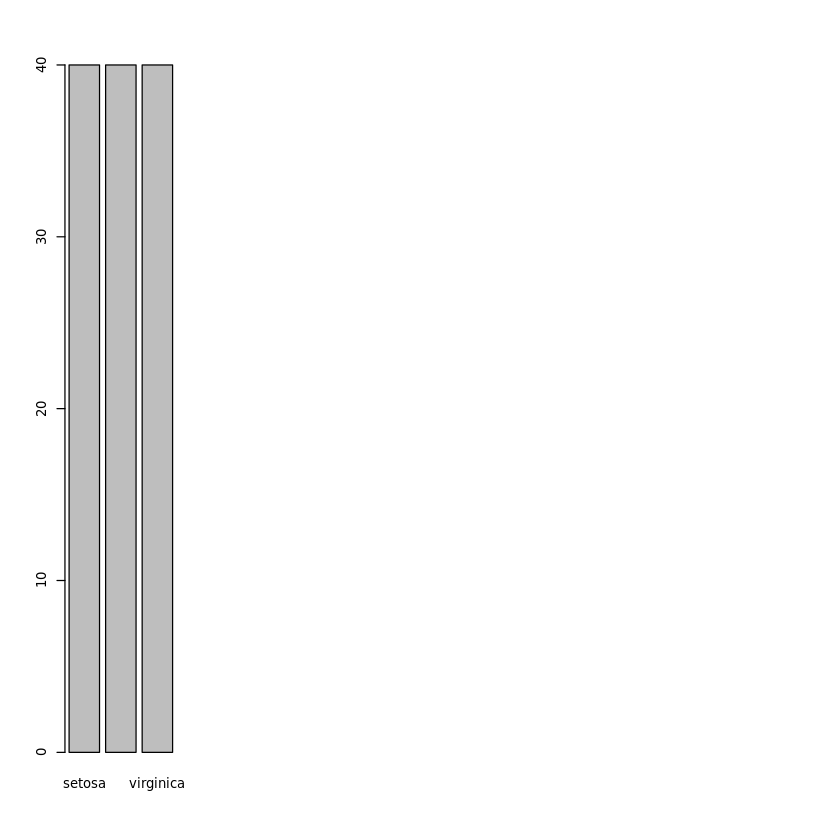

In [74]:
#univariate plots
# split input and output
x <- dataset[,1:4]
y <- dataset[,5]
par(mfrow=c(1,4))
  for(i in 1:4) {
  boxplot(x[,i], main=names(iris)[i])
}
# barplot for class breakdown
plot(y)


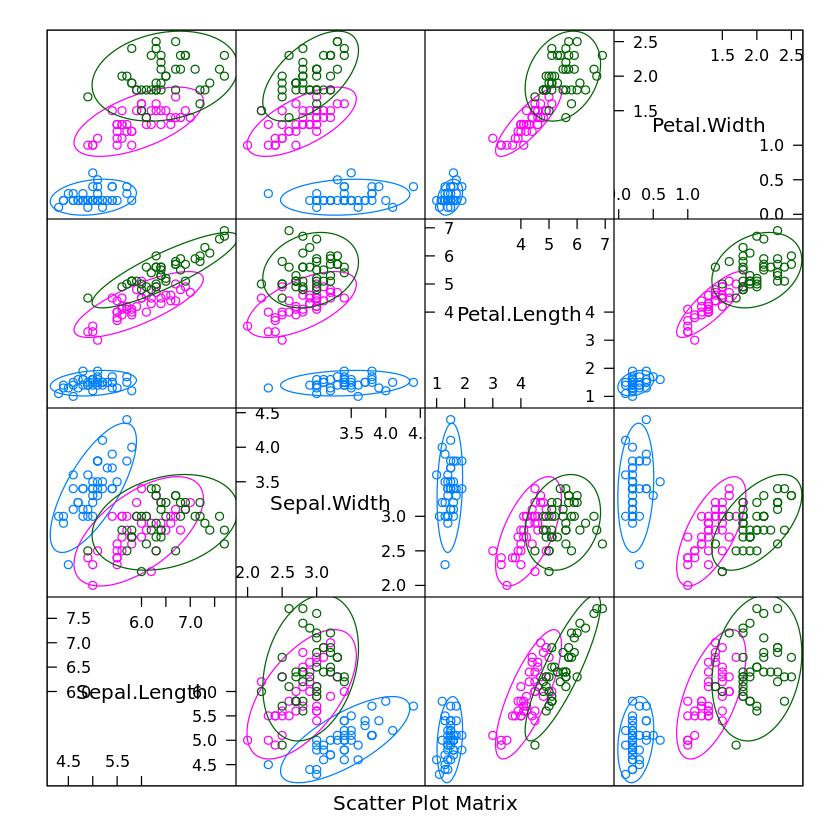

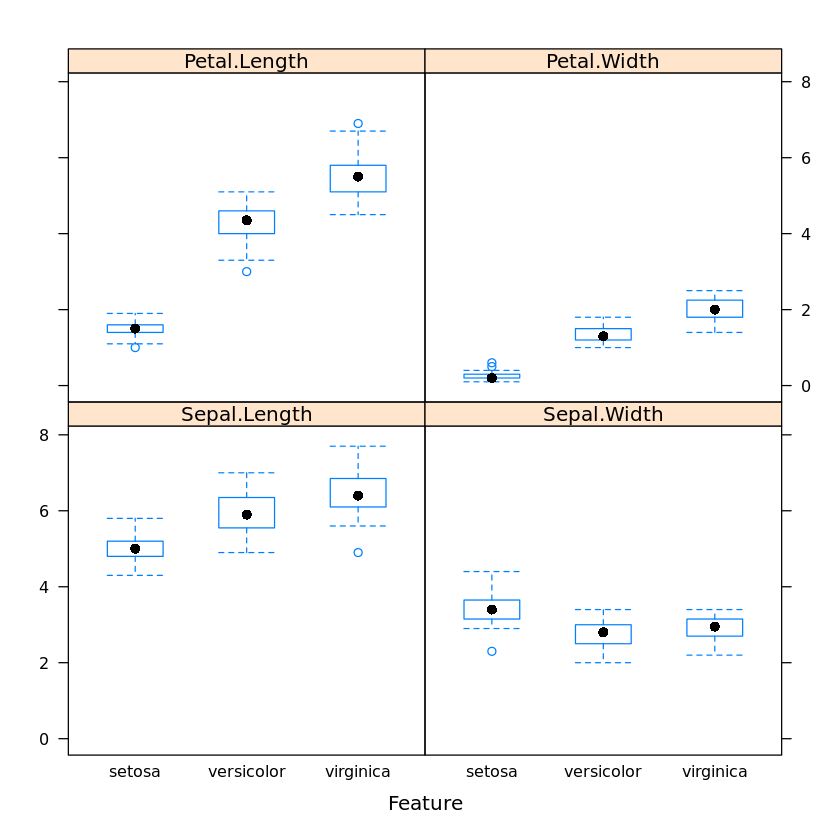

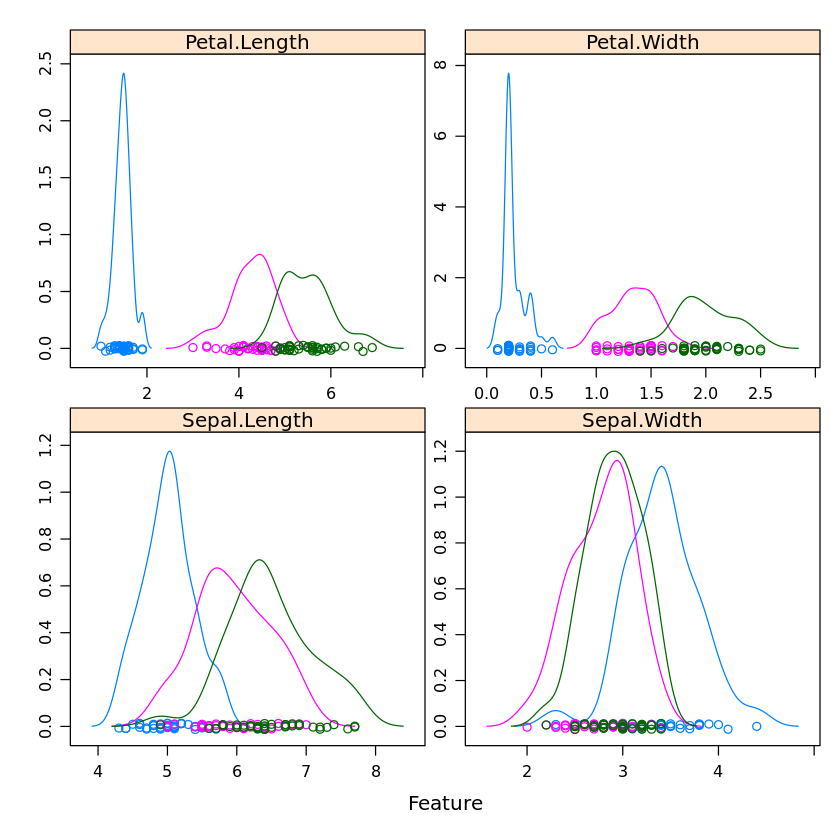

In [75]:
#multivariate plots
featurePlot(x=x, y=y, plot="ellipse")
featurePlot(x=x, y=y, plot="box")
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

In [76]:
#evaluating algorithms
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

In [82]:
#making the algorithms
# a) linear algorithms
set.seed(7)
fit.lda <- train(Species~., data=dataset, method="lda", metric=metric, trControl=control)
# b) nonlinear algorithms
# CART
set.seed(7)
fit.cart <- train(Species~., data=dataset, method="rpart", metric=metric, trControl=control)
# kNN
set.seed(7)
fit.knn <- train(Species~., data=dataset, method="knn", metric=metric, trControl=control)
# c) advanced algorithms
# SVM
set.seed(7)
fit.svm <- train(Species~., data=dataset, method="svmRadial", metric=metric, trControl=control)
# Random Forest
set.seed(7)
fit.rf <- train(Species~., data=dataset, method="rf", metric=metric, trControl=control)


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf 
Number of resamples: 10 

Accuracy 
          Min.   1st Qu.    Median      Mean 3rd Qu. Max. NA's
lda  0.9166667 1.0000000 1.0000000 0.9833333       1    1    0
cart 0.8333333 0.9166667 0.9583333 0.9500000       1    1    0
knn  0.9166667 0.9375000 1.0000000 0.9750000       1    1    0
svm  0.8333333 0.9166667 0.9166667 0.9416667       1    1    0
rf   0.9166667 0.9166667 0.9583333 0.9583333       1    1    0

Kappa 
      Min. 1st Qu. Median   Mean 3rd Qu. Max. NA's
lda  0.875 1.00000 1.0000 0.9750       1    1    0
cart 0.750 0.87500 0.9375 0.9250       1    1    0
knn  0.875 0.90625 1.0000 0.9625       1    1    0
svm  0.750 0.87500 0.8750 0.9125       1    1    0
rf   0.875 0.87500 0.9375 0.9375       1    1    0


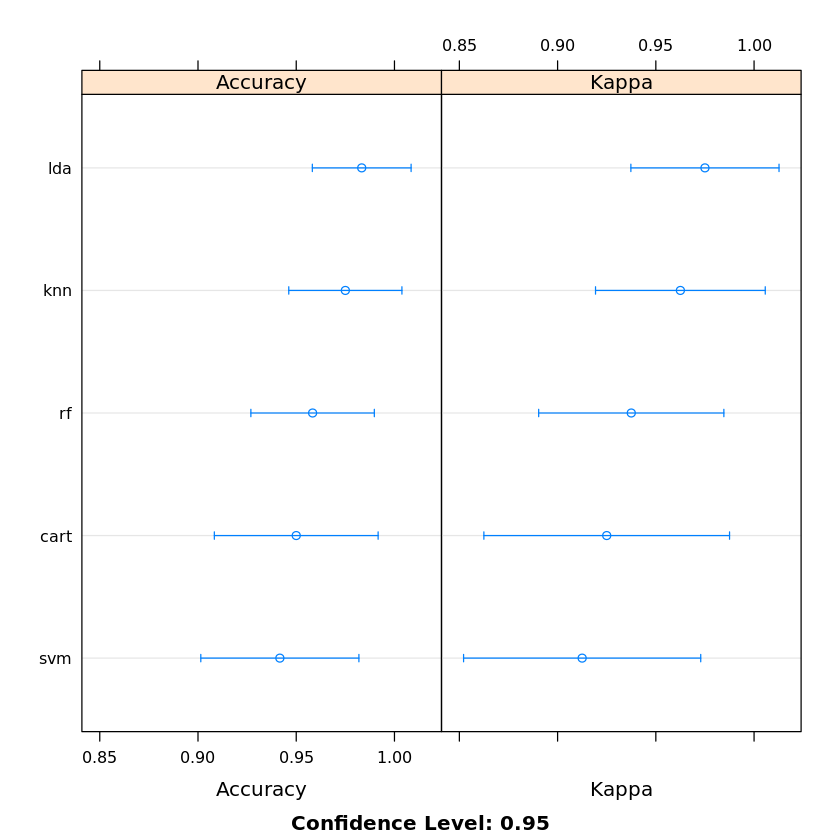

In [84]:
#results and accuracy
results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)
# compare accuracy of models
dotplot(results)

In [85]:
# estimate skill of LDA on the validation dataset
predictions <- predict(fit.lda, validation)
confusionMatrix(predictions, validation$Species)


Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         10         1
  virginica       0          0         9

Overall Statistics
                                          
               Accuracy : 0.9667          
                 95% CI : (0.8278, 0.9992)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 2.963e-13       
                                          
                  Kappa : 0.95            
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           0.9000
Specificity                 1.0000            0.9500           1.0000
Pos Pred Value              1.0000            0.9091           1.0000
Neg Pred Value              1.0000            1.0000           0.9524
P